# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
# Input the validation set
from sklearn.model_selection import train_test_split

# The training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
 
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_validation.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# The shape of an traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

2


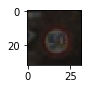

In [3]:
### Data exploration visualization
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
#print ('re-confirm shape of training set', X_train.shape)

training set


(array([  169.,  1781.,  1799.,  1134.,  1578.,  1485.,   332.,  1143.,
         1147.,  1189.,  1619.,  1040.,  1691.,  1730.,   614.,   513.,
          329.,   884.,   982.,   176.,   286.,   261.,   313.,   411.,
          203.,  1181.,   467.,   193.,   415.,   212.,   349.,   623.,
          201.,   576.,   348.,   983.,   317.,   161.,  1627.,   235.,
          289.,   186.,   195.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

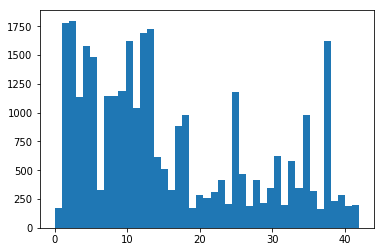

In [4]:
# Histogram for the distribution
print ('training set')
plt.hist(y_train, bins = n_classes)

validation set


(array([  41.,  439.,  451.,  276.,  402.,  375.,   88.,  297.,  263.,
         281.,  391.,  280.,  409.,  430.,  166.,  117.,   91.,  226.,
         218.,   34.,   74.,   69.,   77.,   99.,   67.,  319.,  133.,
          47.,  125.,   58.,  101.,  157.,   39.,  113.,   72.,  217.,
          73.,   49.,  443.,   65.,   71.,   54.,   45.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

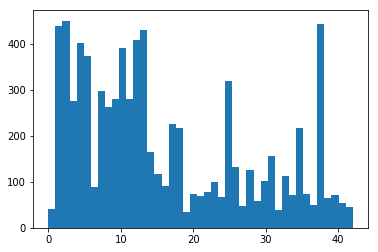

In [5]:
# Histogram for the distribution
print ('validation set')
plt.hist(y_validation, bins = n_classes)

The distributions of three sets (training, validation, test) are similar. There are more examples in some classes, especially between class 0 to 10. 

test set


(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

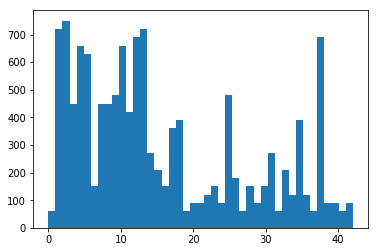

In [6]:
# Histogram for the distribution
print ('test set')
plt.hist(y_test, bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data. It is required to normalize the data.  
## Features and Labels
import numpy as np
a = 0.1
b = 0.9
min = 0
max = 255

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = gray.astype(int)
    return gray

### converting to grayscale
#gray = rgb2gray(image)    
#plt.imshow(gray, cmap = plt.get_cmap('gray'))
#plt.show()
#print (gray.shape,X_train.shape)
#X_train, y_train = gray['features'], gray['labels']

# image normalization with precision of 0.962
print ('Before normalization the mean is', np.ndarray.mean(X_train))
#X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_train =  a + ( ( (X_train - min)*(b - a) )/( max - min ) )
# simple normalization with precision of 0.978
#X_train = (X_train-128.0)/128.0
print ('After normalization, the mean is', (np.ndarray.mean(X_train)),'. The variation is ',(np.ndarray.var(X_train)))

Before normalization the mean is 82.6327907896
After normalization, the mean is 0.359240127967 . The variation is  0.046822756637


### Model Architecture

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
#only necessary to reset if the notebook has not been shutdown
#tf.reset_default_graph()
EPOCHS = 100
BATCH_SIZE = 128

Characteristics and qualities of the architecture

Layer	Description
Input	32x32x3 RGB image
ConvNet 1: 5x5x6 with 16 depth, valid oadding, 1x1 stride, 2x2 max pooling. Output = 14x14x6. 
ConvNet 2: 5x5x6 with 16 depth, valid oadding, 1x1 stride, 2x2 max pooling. Output = 5x5x16. It also has been flattened. Input = 5x5x16. Output = 400. 
Layer 3: Fully Connected. Input = 400. Output = 120.
Layer 4: Fully Connected. Input = 120. Output = 84.
 Layer 5: Fully Connected. Input = 84. Output = 10.
Logit Layer: 43 neurons (1 for each of the different classes)
The ConvNet and Hidden Layers all have RELU.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Calculate and report the accuracy on the training and validation set.
### the accuracy on the test set will be calculated and reported as well.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_prob = 1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
#    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
#    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [11]:
rate = 0.001
#rate = 0.0001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
#save_file = 'model.ckpt'
#saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './lenet')
#    saver.save(sess, save_file)
#    saver.save(sess, 'Lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.615

EPOCH 2 ...
Validation Accuracy = 0.809

EPOCH 3 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.897

EPOCH 5 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.931

EPOCH 7 ...
Validation Accuracy = 0.940

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.959

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.961

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.962

EPOCH 17 ...
Validation Accuracy = 0.965

EPOCH 18 ...
Validation Accuracy = 0.969

EPOCH 19 ...
Validation Accuracy = 0.964

EPOCH 20 ...
Validation Accuracy = 0.975

EPOCH 21 ...
Validation Accuracy = 0.972

EPOCH 22 ...
Validation Accuracy = 0.973

EPOCH 23 ...
Validation Accuracy = 0.971

EPOCH 24 ...
Validation Accura

In [15]:
# evaluate the performance of the model on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


I tried two Convolutional network layers with three fully connected network layers. It takes a lot of time by tuining parameters.
Therfore, I did not change numbers and combinations of layers, from publicly available models like tensorflow examples.
I also check caffe examples from the internet for testing model on new images later due to some errors from the running the model.
I did not find grayscale prepossing improve the model. The batch size was changed to 64 or 256 but the model behavior slightly
got worse. 
The learning rate is tested within a range of 0.0001 to 1 and the rate of 0.01 shows the best result.
The dropout has been tested as well with ranging from 0 to 1 for keep_prob. It decreases the model performance relatively.
The simple normalization results in a good validation accuracy over 0.95 of the model but the mininimum and maximum normalization method contributed to best validation accuracy of the model. 



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

image1.jpg


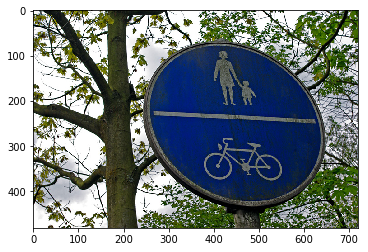

image5.jpg


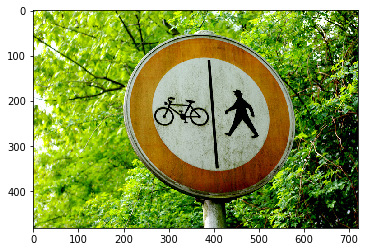

image4.jpg


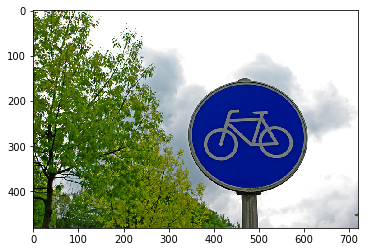

image3.jpg


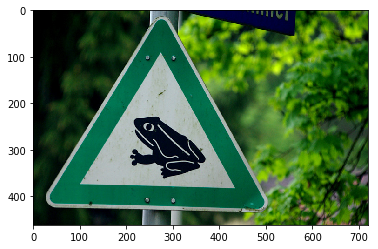

image2.jpg


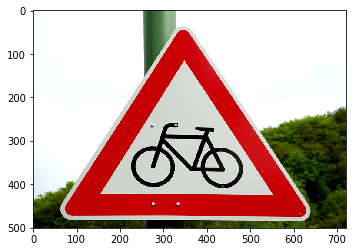

(5, 32, 32, 3)


In [17]:
import numpy as np
import cv2
import matplotlib.image as mpimg
### Data exploration visualization
import matplotlib.pyplot as plt
import os

# Visualizations will be shown in the notebook.
%matplotlib inline
# Load an color image
files = os.listdir("new_images/")
#files = files[1:6]
x_p = []
arrs = []
i  = 1
for file in files:
    print(file)
    name = 'new_images/' + file
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.show()     
    image  = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)
    x_p.append(image)
    i+=1
   
x_p = np.array(x_p)
print (x_p.shape)

### Predict the Sign Type for Each Image

In [18]:
### Pre-process the downloaded images
import numpy as np
import cv2

a = 0.1
b = 0.9
min = 0.
max = 255.

# image normalization 
print ('Before normalization the mean is', (np.ndarray.mean(x_p)),'. The variation is ',(np.ndarray.var(x_p)))
x_p =  a + ( ( (x_p - min)*(b - a) )/( max - min ) )
print ('After normalization, the mean is', (np.ndarray.mean(x_p)),'. The variation is ',(np.ndarray.var(x_p)))

Before normalization the mean is 118.689518229 . The variation is  7045.58608805
After normalization, the mean is 0.472359272876 . The variation is  0.069345253308


In [19]:
#import tensorflow as tf
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
#y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, n_classes)

Prediction : 40 Roundabout mandatory
Prediction : 9 No passing
Prediction : 40 Roundabout mandatory
Prediction : 3 Speed limit (60km/h)
Prediction : 29 Bicycles crossing


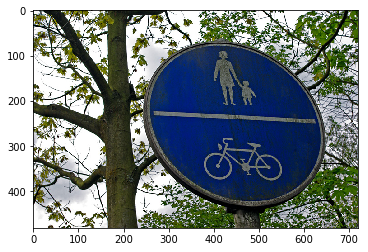

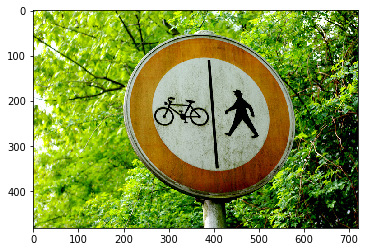

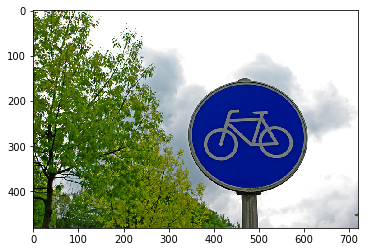

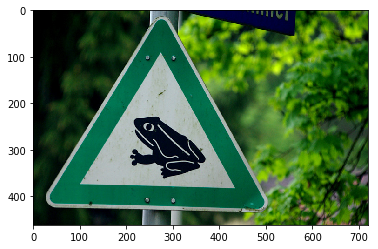

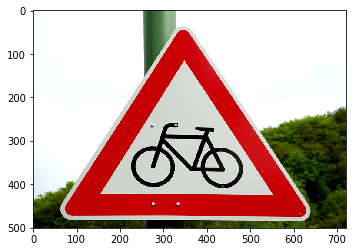

In [20]:
### Run the predictions and use the model to output the prediction for each image.
import csv
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))   
    prediction = tf.argmax(logits, 1)   
    classes = sess.run(prediction, feed_dict={x: x_p})
    
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    class_names = dict(reader)
    
for i in range(5):
    print('Prediction :', classes[i],class_names[str(classes[i])] )
    
for file in files:
    name = 'new_images/' + file
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.show()     

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# The 3th image is "bickyle only' but not in the class labels; the 2nd and 4th images are not recognizable. 
actual_class = [27,0, 0, 0, 29]
accuracy = np.sum(classes == actual_class)/5.*100.
print ('The accuracy is',accuracy, '%.')

The accuracy is 20.0 %.


The qualities of the image(s) that might make classification difficult?" are listed as follows:
1. Low resolution of the images:
Some of the images contain two classes (such as bickyle only and pedestrian only) and the low resolution makes it hard to detect and determine the class.
2. Brightness of the image: The normalization may decrease the brightness of each pixel and increase the difficulty of the model prediction.
3. The Contrast of the image: There are trees surrounding the traffic sign, which may confuse the model with the green feature of the traffic sign. 
4. The Angle of the traffic sign:Especially the first picture is taken at a tilted analge, which makes the model difficult to detect lines or shapes. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('lenet.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))   
    
    # model evaluation
    prob = tf.nn.softmax(logits)

    test_prediction = sess.run(tf.nn.top_k(prob,k=5),feed_dict={x: x_p})

In [24]:
#Output softmax
for i in range(len(test_prediction[0])):
    print('The probabilities of', 'image', i+1, ':', test_prediction[0][i], '\n   The predicted classes:', test_prediction[1][i])

The probabilities of image 1 : [  1.00000000e+00   1.92715540e-13   4.81664756e-16   3.03993812e-19
   6.12205035e-23] 
   The predicted classes: [40 27 18 33 37]
The probabilities of image 2 : [  7.72837460e-01   2.27162212e-01   3.36587618e-07   1.47358898e-08
   7.90714230e-11] 
   The predicted classes: [ 9 15  2 28 35]
The probabilities of image 3 : [  9.99961853e-01   2.24298674e-05   7.35597450e-06   4.95490394e-06
   2.70778196e-06] 
   The predicted classes: [40 35 32  1 11]
The probabilities of image 4 : [  1.00000000e+00   2.42110731e-09   1.24890642e-09   1.21334498e-10
   4.01215102e-16] 
   The predicted classes: [ 3 13 38 28 40]
The probabilities of image 5 : [  1.00000000e+00   4.60036562e-20   5.16563229e-25   3.70506951e-26
   5.17312063e-27] 
   The predicted classes: [29 24 30 22 25]


1. Image 1 - which is a combination of 27 and 29 but the model failed to predict either one.
2. Image 2 - unrecognizable class (possible new class to be added), creating high un-prediction of the model.
3. Image 3 - unrecognizable class (possible new class to be added), creating high un-prediction of the model.
4. Image 4 - not a traffic sign (more likely a park sign), creating high un-prediction of the model.
5. Image 5 - Bickyle crossing, with a probability of 1, resulting in a good prediction of the model. 
Here are the results of the prediction:
                                     Image	        Prediction              Probability
Pedestrians and cycles only, no separation	        Roundabout mandatory    1
                                    Unkown	        No passing              0.77
                    Routes for cycles only	        Roundabout mandatory    0.99
                                   Unknown	        Speed limit (60km/h)    1
                         Bicycles crossing	        Bicycles crossing       1
For the first and third images, the model predicts the same as roundabout mandatory because they contains the roundabout shapes.
For the second image, this is unkown and because part of features include similar pattern and layout for no passing (although shapes are totally different), this is determined as No Passing. Although it has all of features of "No Vehicles", which looks like part of "No Passing".
Prediction      Probability
No passing      0.77
No vehicles     0.22
For the fourth image, this is tested for fun, with a frog. The model is totally confused with a speed limit. It is probably because the frog looks like with curves of "60". And due to the low contract with the tree environment, the model did not catch the triangular shape of sign.
The fifth image is easy for the model. It gives 100% accuracy for this sign.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")